In [53]:
# install.packages("ggplot2")
# install.packages("psych")
library("ggplot2")
library("car")
library("tidyverse")
# library("psych")

In [54]:
raw <- read.csv("csgo_round_snapshots.csv")

In [55]:
col <- colnames(raw)
col

str(raw, list.len = ncol(raw))  

[1] "time_left"                    "ct_score"                    
 [3] "t_score"                      "map"                         
 [5] "bomb_planted"                 "ct_health"                   
 [7] "t_health"                     "ct_armor"                    
 [9] "t_armor"                      "ct_money"                    
[11] "t_money"                      "ct_helmets"                  
[13] "t_helmets"                    "ct_defuse_kits"              
[15] "ct_players_alive"             "t_players_alive"             
[17] "ct_weapon_ak47"               "t_weapon_ak47"               
[19] "ct_weapon_aug"                "t_weapon_aug"                
[21] "ct_weapon_awp"                "t_weapon_awp"                
[23] "ct_weapon_bizon"              "t_weapon_bizon"              
[25] "ct_weapon_cz75auto"           "t_weapon_cz75auto"           
[27] "ct_weapon_elite"              "t_weapon_elite"              
[29] "ct_weapon_famas"              "t_weapon_famas"              
[31] "ct_weapon_g3sg1"              "t_weapon_g3sg1"              
[33] "ct_weapon_galilar"            "t_weapon_galilar"            
[35] "ct_weapon_glock"              "t_weapon_glock"              
[37] "ct_weapon_m249"               "t_weapon_m249"               
[39] "ct_weapon_m4a1s"              "t_weapon_m4a1s"              
[41] "ct_weapon_m4a4"               "t_weapon_m4a4"               
[43] "ct_weapon_mac10"              "t_weapon_mac10"              
[45] "ct_weapon_mag7"               "t_weapon_mag7"               
[47] "ct_weapon_mp5sd"              "t_weapon_mp5sd"              
[49] "ct_weapon_mp7"                "t_weapon_mp7"                
[51] "ct_weapon_mp9"                "t_weapon_mp9"                
[53] "ct_weapon_negev"              "t_weapon_negev"              
[55] "ct_weapon_nova"               "t_weapon_nova"               
[57] "ct_weapon_p90"                "t_weapon_p90"                
[59] "ct_weapon_r8revolver"         "t_weapon_r8revolver"         
[61] "ct_weapon_sawedoff"           "t_weapon_sawedoff"           
[63] "ct_weapon_scar20"             "t_weapon_scar20"             
[65] "ct_weapon_sg553"              "t_weapon_sg553"              
[67] "ct_weapon_ssg08"              "t_weapon_ssg08"              
[69] "ct_weapon_ump45"              "t_weapon_ump45"              
[71] "ct_weapon_xm1014"             "t_weapon_xm1014"             
[73] "ct_weapon_deagle"             "t_weapon_deagle"             
[75] "ct_weapon_fiveseven"          "t_weapon_fiveseven"          
[77] "ct_weapon_usps"               "t_weapon_usps"               
[79] "ct_weapon_p250"               "t_weapon_p250"               
[81] "ct_weapon_p2000"              "t_weapon_p2000"              
[83] "ct_weapon_tec9"               "t_weapon_tec9"               
[85] "ct_grenade_hegrenade"         "t_grenade_hegrenade"         
[87] "ct_grenade_flashbang"         "t_grenade_flashbang"         
[89] "ct_grenade_smokegrenade"      "t_grenade_smokegrenade"      
[91] "ct_grenade_incendiarygrenade" "t_grenade_incendiarygrenade" 
[93] "ct_grenade_molotovgrenade"    "t_grenade_molotovgrenade"    
[95] "ct_grenade_decoygrenade"      "t_grenade_decoygrenade"      
[97] "round_winner"

'data.frame':	122410 obs. of  97 variables:
 $ time_left                   : num  175 156 96 76 175 ...
 $ ct_score                    : num  0 0 0 0 1 1 1 1 1 2 ...
 $ t_score                     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ map                         : chr  "de_dust2" "de_dust2" "de_dust2" "de_dust2" ...
 $ bomb_planted                : chr  "False" "False" "False" "False" ...
 $ ct_health                   : num  500 500 391 391 500 500 295 295 249 500 ...
 $ t_health                    : num  500 500 400 400 500 500 111 111 89 500 ...
 $ ct_armor                    : num  0 400 294 294 192 500 296 296 269 196 ...
 $ t_armor                     : num  0 300 200 200 0 0 0 0 0 0 ...
 $ ct_money                    : num  4000 600 750 750 18350 ...
 $ t_money                     : num  4000 650 500 500 10750 ...
 $ ct_helmets                  : num  0 0 0 0 0 5 3 3 3 2 ...
 $ t_helmets                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_defuse_kits              : num  0 1 1 1 1

In [56]:
### Features seleting (Assumed to be useful):
# time_left
# bomb_planted
# ct_health, ct_armor, ct_money, ct_helmets, ct_defuse_kits, ct_players_alive
# t_health, t_armor, t_money, t_helmets, t_players_alive
# ct_weapon_ak47, ct_weapon_awp, ct_weapon_m4a1s, ct_weapon_m4a4, ct_weapon_deagle
# t_weapon_ak47, t_weapon_awp, t_weapon_m4a1s, t_weapon_m4a4, t_weapon_deagle, t_weapon_tec9
# ct_grenade_hegrenade, ct_grenade_flashbang, ct_grenade_smokegrenade, ct_grenade_incendiarygrenade, ct_grenade_molotovgrenade
# t_grenade_hegrenade, t_grenade_flashbang, t_grenade_smokegrenade, t_grenade_incendiarygrenade, t_grenade_molotovgrenade
## For incendiary in T, probablyt can combine with molotov to reduce complexity?

### Doubt to be useful

# ct_weapon_bizon, ct_weapon_elite, ct_weapon_g3sg1,
# t_weapon_bizon, t_weapon_elite, t_weapon_g3sg1, 

# ct_weapon_mag7, ct_weapon_m249, ct_weapon_mac10, ct_weapon_mp5sd, ct_weapon_mp7, ct_weapon_mp9, ct_weapon_negev, ct_weapon_nova
# t_weapon_mag7, t_weapon_m249, t_weapon_mac10, t_weapon_mp5sd, t_weapon_mp7, t_weapon_mp9, t_weapon_negev, t_weapon_nova

# ct_weapon_p90, ct_weapon_r8revolver, ct_weapon_sawedoff, ct_weapon_scar20, ct_weapon_sg553, ct_weapon_ssg08, ct_weapon_ump45, ct_weapon_xm1014, ct_weapon_fiveseven
# t_weapon_p90, t_weapon_r8revolver, t_weapon_sawedoff, t_weapon_scar20, t_weapon_sg553, t_weapon_ssg08, t_weapon_ump45, t_weapon_xm1014, t_weapon_fiveseven


### 100% not useful
# ct_grenade_decoygrenade
# t_grenade_decoygrenade


[1] "de_dust2"    "de_mirage"   "de_nuke"     "de_inferno"  "de_overpass"
[6] "de_vertigo"  "de_train"    "de_cache"

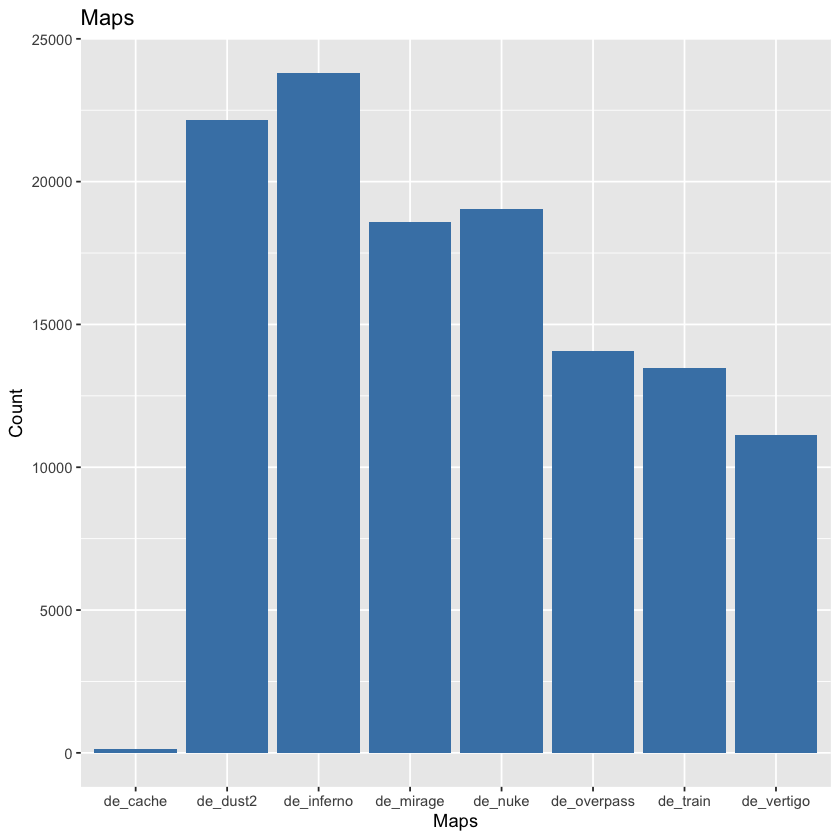

In [57]:
df <- raw

mapGroups <- unique(df$map)
mapGroups

ggplot(df, aes(x = map)) + 
  geom_bar(fill = "steelblue") + 
  labs(title = "Maps", 
       x = "Maps", y = "Count") 

# Trying to convert map to indicator variable
df$dust2 <- ifelse(raw$map == "de_dust2", 1, 0)
df$mirage <- ifelse(raw$map == "de_mirage", 1, 0)
df$nuke <- ifelse(raw$map == "de_nuke", 1, 0)
df$inferno <- ifelse(raw$map == "de_inferno", 1, 0)
df$overpass <- ifelse(raw$map == "de_overpass", 1, 0)
df$vertigo <- ifelse(raw$map == "de_vertigo", 1, 0)
df$train <- ifelse(raw$map == "de_train", 1, 0)
df$cache <- ifelse(raw$map == "de_cache", 1, 0)

df$CTWin <- ifelse(raw$round_winner == "CT", 1, 0)

df$bomb_planted <- ifelse(raw$bomb_planted == "True", 1, 0)

df$t_grenade_MollyAndInc <- raw$t_grenade_molotovgrenade + raw$t_grenade_incendiarygrenade
df$ct_grenade_MollyAndInc <- raw$ct_grenade_molotovgrenade + raw$ct_grenade_incendiarygrenade


In [ ]:
options(repr.matrix.max.cols=999, repr.matrix.max.rows=999)
dfCor <- cor(df)
dfCor

# vifVal <- vif(lmModel)

Warning message in cor(df):
“the standard deviation is zero”


,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,dust2,mirage,nuke,inferno,overpass,vertigo,train,cache,CTWin,t_grenade_MollyAndInc,ct_grenade_MollyAndInc
time_left,1.0000000000,0.0003814671,-0.0030667546,-0.4860481038,0.6845140212,0.6789520187,-0.0899498632,-0.1955792380,0.3745297895,0.3417174527,-0.1035054846,-0.2487986407,-0.0631790990,0.6389037300,0.5976303592,-3.046648e-03,-0.1746858394,-0.0306574448,-0.0188290872,-0.0716304088,-0.121446277,NA,1.465068e-03,-0.0427638980,-0.0429941871,7.263751e-03,-0.0104712041,-0.0502439729,-0.0165235747,NA,1.236184e-02,-0.0063772963,-0.0555925334,0.0109139381,0.5218577038,8.943834e-04,NA,-0.0432586651,-0.0105005741,-1.356417e-01,-0.0451115331,-0.0197354731,-0.0401149124,-1.231295e-02,-5.159889e-03,-0.0044594507,-1.566803e-02,-7.659118e-03,-0.0071454629,-0.0383626731,-0.0319946372,NA,8.949082e-04,-0.0071910439,-3.467251e-03,-1.434623e-03,-7.430141e-04,NA,-3.351848e-04,NA,-4.762238e-03,-2.079242e-03,4.046725e-03,0.0077952152,-0.1354173737,-0.0500686436,-2.665689e-02,-0.0355930390,-0.0340445989,-0.0130905639,-7.726478e-03,-6.989066e-02,-8.185284e-02,-0.0351165422,0.0019687878,0.523632941,-0.0264736419,-4.803112e-02,-3.327353e-02,0.1139664278,-0.0055350868,4.082116e-03,-0.0260092779,0.120774080,0.0474192737,0.0062782970,0.007461786,0.1081407962,0.0362345741,0.0028992944,1.221120e-02,0.0240795246,-0.0329638869,-0.0072739732,-0.0087736070,0.0124124137,-6.287101e-03,6.899379e-02,0.0450853659,0.1342456996
ct_score,0.0003814671,1.0000000000,0.6267258273,-0.0157069686,0.0164948838,-0.0109873879,0.1005176191,0.0347893471,0.2494160183,0.0747002163,0.1815133043,0.0631456902,0.2509833418,0.0140862795,-0.0152191061,8.003928e-02,0.0521828912,0.0464635317,-0.0109109862,0.2065769892,0.107290857,NA,-5.111991e-03,0.0063164982,0.0160695946,1.731538e-02,0.0032875675,-0.0362090425,-0.0277165310,NA,1.878538e-02,-0.0209713463,-0.0358571341,-0.0068603943,0.0199914009,4.350103e-03,NA,0.0653477847,-0.0034330516,1.221910e-01,-0.0096735696,-0.0445582198,-0.0833029040,-1.126098e-02,6.514716e-03,-0.0071385653,-1.404813e-02,-1.626564e-02,-0.0209667009,-0.0440616668,-0.0320604019,NA,4.946763e-03,-0.0100872834,-8.638856e-04,-3.627199e-03,-1.844711e-03,NA,-6.685988e-04,NA,3.609758e-03,1.409886e-02,-1.019834e-03,0.0931603110,0.0742645053,-0.0965687903,-2.703841e-02,-0.0317448926,-0.0582612507,-0.0040660831,-1.209912e-02,-1.736092e-02,-1.055296e-03,0.0337521298,-0.0247901764,-0.032710418,-0.1446945848,1.414115e-01,9.577841e-03,-0.0136558140,-0.0275927754,1.488288e-02,0.0480441152,0.124058506,-0.0071189595,0.1682189917,0.051485420,0.1369872124,0.0384981348,0.0094922681,5.048714e-03,0.0014296021,-0.0110883344,-0.0127306239,0.0044724050,0.0033526938,3.

# First model that without deleting any of the weapons

In [58]:
df <- subset(df, select = -c(map, round_winner, ct_grenade_decoygrenade, t_grenade_decoygrenade
                              , t_grenade_molotovgrenade, t_grenade_incendiarygrenade
                              , ct_grenade_molotovgrenade, ct_grenade_incendiarygrenade
                              ))
str(df, list.len = ncol(df))  

'data.frame':	122410 obs. of  100 variables:
 $ time_left              : num  175 156 96 76 175 ...
 $ ct_score               : num  0 0 0 0 1 1 1 1 1 2 ...
 $ t_score                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ bomb_planted           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_health              : num  500 500 391 391 500 500 295 295 249 500 ...
 $ t_health               : num  500 500 400 400 500 500 111 111 89 500 ...
 $ ct_armor               : num  0 400 294 294 192 500 296 296 269 196 ...
 $ t_armor                : num  0 300 200 200 0 0 0 0 0 0 ...
 $ ct_money               : num  4000 600 750 750 18350 ...
 $ t_money                : num  4000 650 500 500 10750 ...
 $ ct_helmets             : num  0 0 0 0 0 5 3 3 3 2 ...
 $ t_helmets              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ct_defuse_kits         : num  0 1 1 1 1 1 0 0 0 0 ...
 $ ct_players_alive       : num  5 5 4 4 5 5 3 3 3 5 ...
 $ t_players_alive        : num  5 5 4 4 5 5 2 2 1 5 ...
 $ ct_weapon_ak47         : num  

In [59]:
set.seed(1)

split <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.7,0.3))
train  <- df[split, ]
test   <- df[!split, ]


In [60]:
lModel <- glm(CTWin ~ ., data=train, family = "binomial")

In [61]:
summary(lModel)


Call:
glm(formula = CTWin ~ ., family = "binomial", data = train)

Coefficients: (7 not defined because of singularities)
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              8.227e-01  2.880e-01   2.857 0.004279 ** 
time_left               -1.714e-03  3.763e-04  -4.554 5.26e-06 ***
ct_score                 5.538e-03  2.525e-03   2.193 0.028311 *  
t_score                 -2.786e-03  2.485e-03  -1.121 0.262127    
bomb_planted            -1.045e+00  4.413e-02 -23.680  < 2e-16 ***
ct_health                4.631e-03  3.517e-04  13.166  < 2e-16 ***
t_health                -3.319e-03  2.918e-04 -11.375  < 2e-16 ***
ct_armor                 2.820e-03  1.204e-04  23.413  < 2e-16 ***
t_armor                 -2.858e-03  1.397e-04 -20.468  < 2e-16 ***
ct_money                 1.464e-05  1.238e-06  11.828  < 2e-16 ***
t_money                 -1.006e-05  1.092e-06  -9.212  < 2e-16 ***
ct_helmets               3.819e-03  1.036e-02   0.369 0.712405    
t_helm

In [62]:
predictions <- predict(lModel, test, type = "response")

correct <- 0

for (i in 1:length(predictions)){
    if (predictions[i] >= 0.5 && test$CTWin[i] == 1){
        correct <- correct + 1
    }
}

print(correct/length(predictions))

[1] 0.368768


In [63]:
# How if use im only?
lmModel <- lm(CTWin ~ ., data=train)
summary(lmModel)


Call:
lm(formula = CTWin ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16892 -0.35441  0.00961  0.36104  1.10974 

Coefficients: (7 not defined because of singularities)
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              6.405e-01  4.373e-02  14.648  < 2e-16 ***
time_left               -4.663e-04  5.887e-05  -7.920 2.40e-15 ***
ct_score                 9.398e-04  4.079e-04   2.304 0.021243 *  
t_score                 -4.462e-04  4.024e-04  -1.109 0.267441    
bomb_planted            -1.230e-01  5.882e-03 -20.916  < 2e-16 ***
ct_health                5.292e-04  5.066e-05  10.445  < 2e-16 ***
t_health                -3.903e-04  4.175e-05  -9.349  < 2e-16 ***
ct_armor                 5.081e-04  1.969e-05  25.803  < 2e-16 ***
t_armor                 -5.358e-04  2.333e-05 -22.963  < 2e-16 ***
ct_money                 2.862e-06  2.000e-07  14.306  < 2e-16 ***
t_money                 -1.920e-06  1.771e-07 -10.843  < 2

In [65]:
# SSR Analysis

anovaLM <- anova(lmModel)
anovaLM

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
time_left,1,1.040773e+02,1.040773e+02,6.356617e+02,9.527922e-140
ct_score,1,6.852487e+01,6.852487e+01,4.185221e+02,8.542891e-93
t_score,1,1.309547e+02,1.309547e+02,7.998182e+02,3.800930e-175
bomb_planted,1,6.602881e+02,6.602881e+02,4.032772e+03,0.000000e+00
ct_health,1,3.462766e+02,3.462766e+02,2.114917e+03,0.000000e+00
t_health,1,2.490699e+03,2.490699e+03,1.521218e+04,0.000000e+00
ct_armor,1,1.382224e+03,1.382224e+03,8.442063e+03,0.000000e+00
t_armor,1,1.508390e+03,1.508390e+03,9.212637e+03,0.000000e+00
ct_money,1,6.699115e+01,6.699115e+01,4.091547e+02,9.136632e-91
